In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Marin\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df_5000_D1_H4_H1 = pd.read_csv('C:/Users/Marin/Desktop/doktorar/qoutes/nzdusd/testing/AUDUSD/sample5000_detailed_reports.csv')
df_5000_D1_H4_H1.head()


,Unnamed: 0,Pass,Profit,Total_trades,Profit_factor,Expected_Payoff,Drawdown_$,Drawdown_%,??,volume_1,volume_2,volume_3,pips2,pips3,pips1,hiddenAction,timeFrame,risk ratio
0,0,268997,4271.00,63,8.09,67.79,2111.40,2.10,0.0,7,1.0,1.0,18,14,1,0,1440,2.022828
1,1,183285,2184.80,63,5.04,34.68,1454.52,1.45,0.0,5,0.9,0.3,17,10,1,0,1440,1.502076
2,2,109256,1904.76,63,8.05,30.23,1618.74,1.62,0.0,6,0.6,0.3,6,7,1,0,1440,1.176693
3,3,85669,2706.16,63,11.74,42.95,2439.84,2.44,0.0,9,0.7,0.7,3,6,1,0,1440,1.109155
4,4,326453,2254.84,63,13.84,35.79,961.86,0.96,0.0,3,0.6,0.5,13,17,1,0,1440,2.344250


In [65]:
#split dataset in features and target variable
feature_cols = ["volume_1", "volume_2", "volume_3", "pips2","pips3", "timeFrame"]
X = df_5000_D1_H4_H1[feature_cols] # Features
y = df_5000_D1_H4_H1['risk ratio'] # Target variable

#digitize y
y_enc = np.digitize(y, [0,1,2,3,4,5,6,7], right=True)

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.3, random_state=1)



In [59]:
# lab_enc = preprocessing.LabelEncoder()
# training_scores_encoded = lab_enc.fit_transform(y_train)

# y_tmp = y_train.to_numpy()
# y_tmp= np.reshape(y_tmp, (-1,1))

# lab_enc = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy = 'uniform')
# y_train_enc = lab_enc.fit(y_tmp)
# y_train_enc = pd.Series(y_train_enc)

# if y_train <= 1:
#     y_train_enc = 1
# elif y_train<=2:
#     y_train_enc = 2
# elif y_train<=3:
#     y_train_enc = 3
# elif y_train<=4:
#     y_train_enc = 4
# elif y_train<=5:
#     y_train_enc = 5
# elif y_train<=6:
#     y_train_enc = 6
# else:
#     y_train_enc = 7
    
# def discretize(data, bins):
#     split = np.array_split(np.sort(data), bins)
#     cutoffs = [x[-1] for x in split]
#     cutoffs = cutoffs[:-1]
#     discrete = np.digitize(data, cutoffs, right=True)
#     return discrete, cutoffs

# y_train_enc, cutoff = discretize(y_train, 7)

# y_train_enc = pd.cut(y_train, [1,2,3,4,5,6,7])
# y_train_enc = pd.Series(y_train_enc)

#y_train_enc = np.digitize(y_train, [0,1,2,3,4], right=True)

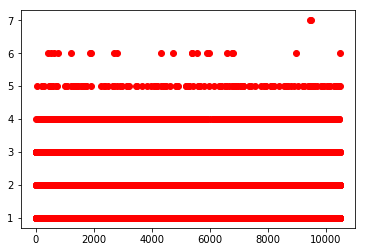

In [66]:
#sns.lineplot(data=spotify_data['Despacito'], label="Despacito")
# plt.plot(range(4500),y_test, 'ro')
plt.plot(y_train, 'ro')
# plt.plot(training_scores_encoded)
# plt.plot(y_test, 'r', '.')
plt.show()
# sns.scatterplot(x=y_pred, y=y_test)
# type(y_train_enc)


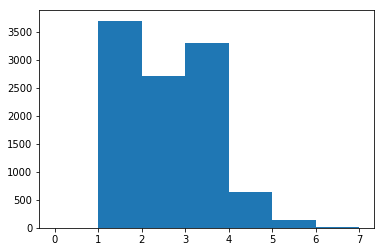

In [67]:
plt.hist(y_train, bins=[0,1,2,3,4,5,6,7])
# plt.ylabel('distribution of returns')
# plt.xlabel('intervals')
plt.show()

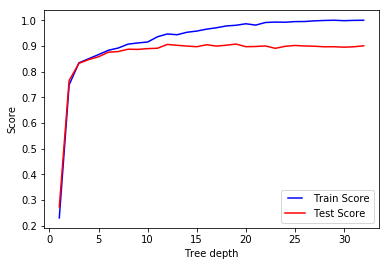

In [85]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    clf_2 = DecisionTreeRegressor(criterion='mae',max_depth=max_depth,presort=True)
    clf_2 = clf_2.fit(X_train,y_train)
    y_pred = clf_2.predict(X_train)
    tree_score=clf_2.score(X_train, y_train)
   # Add auc score to previous train results
    train_results.append(tree_score)   

    y_pred = clf_2.predict(X_test)
    tree_score=clf_2.score(X_test, y_test)
   # Add auc score to previous test results
    test_results.append(tree_score)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train Score')
line2, = plt.plot(max_depths, test_results, 'r', label='Test Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.show()

In [86]:
test_results 

[0.27320779649818294,
 0.7648249091509746,
 0.8319293029402048,
 0.846589032044929,
 0.8575322101090188,
 0.8752890650809382,
 0.8777151470102411,
 0.8869032870829204,
 0.8862322431450281,
 0.8892261314833169,
 0.8907230756524612,
 0.9054860422860919,
 0.9021308225966304,
 0.8991369342583416,
 0.8966076148001322,
 0.9043504294681203,
 0.8991369342583416,
 0.9024405351833499,
 0.9069829864552362,
 0.8967624710934919,
 0.8974851337958375,
 0.8996531219028742,
 0.8903617443012884,
 0.898207796498183,
 0.9015113974231913,
 0.8994466468450611,
 0.8985175090849026,
 0.8963495209778659,
 0.8965559960356789,
 0.8949041955731748,
 0.8963495209778659,
 0.9002725470763132]

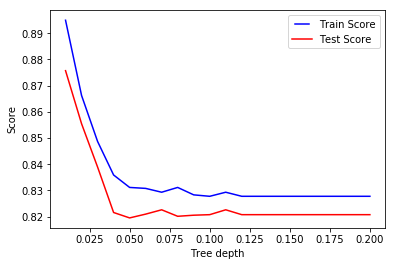

In [87]:
min_samples_splits = np.linspace(0.01, 0.2, 20, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    clf_2 = DecisionTreeRegressor(criterion='mae',min_samples_split=min_samples_split,presort=True)
    clf_2 = clf_2.fit(X_train,y_train)
    y_pred = clf_2.predict(X_train)
    tree_score=clf_2.score(X_train, y_train)
   # Add auc score to previous train results
    train_results.append(tree_score)   

    y_pred = clf_2.predict(X_test)
    tree_score=clf_2.score(X_test, y_test)
   # Add auc score to previous test results
    test_results.append(tree_score)
    
line3, = plt.plot(min_samples_splits, train_results, 'b', label='Train Score')
line4, = plt.plot(min_samples_splits, test_results, 'r', label='Test Score')
plt.legend(handler_map={line3: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.show()

In [88]:
test_results

[0.8757020151965642,
 0.8554674595308887,
 0.8389494549058474,
 0.821605550049554,
 0.8195407994714239,
 0.820986124876115,
 0.8226379253386191,
 0.8201602246448629,
 0.820573174760489,
 0.820779649818302,
 0.8226379253386191,
 0.820779649818302,
 0.820779649818302,
 0.820779649818302,
 0.820779649818302,
 0.820779649818302,
 0.820779649818302,
 0.820779649818302,
 0.820779649818302,
 0.820779649818302]

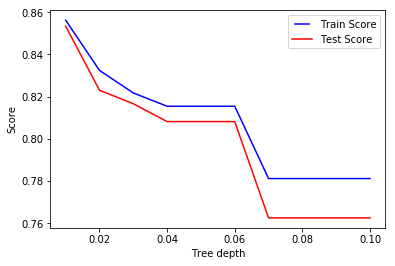

In [89]:
min_samples_leafs = np.linspace(0.01, 0.1, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    clf_2 = DecisionTreeRegressor(criterion='mae',min_samples_leaf=min_samples_leaf,presort=True)
    clf_2 = clf_2.fit(X_train,y_train)
    y_pred = clf_2.predict(X_train)
    tree_score=clf_2.score(X_train, y_train)
   # Add auc score to previous train results
    train_results.append(tree_score)   

    y_pred = clf_2.predict(X_test)
    tree_score=clf_2.score(X_test, y_test)
   # Add auc score to previous test results
    test_results.append(tree_score)

line5, = plt.plot(min_samples_leafs, train_results, 'b', label='Train Score')
line6, = plt.plot(min_samples_leafs, test_results, 'r', label='Test Score')
plt.legend(handler_map={line5: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.show()

In [90]:
test_results

[0.8534027089527585,
 0.8230508754542452,
 0.8166501486620417,
 0.808184671291708,
 0.808184671291708,
 0.808184671291708,
 0.7625536835150314,
 0.7625536835150314,
 0.7625536835150314,
 0.7625536835150314]

In [91]:
# Create Decision Tree regressor object
clf_2 = DecisionTreeRegressor(criterion='mae',
                              max_depth=6,
                              min_samples_split=0.02,
                              min_samples_leaf=0.06,
                              presort=True)

# Train Decision Tree Classifer
clf_2 = clf_2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_2.predict(X_test)

tree_score=clf_2.score(X_test, y_test)
tree_score

0.808184671291708


^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


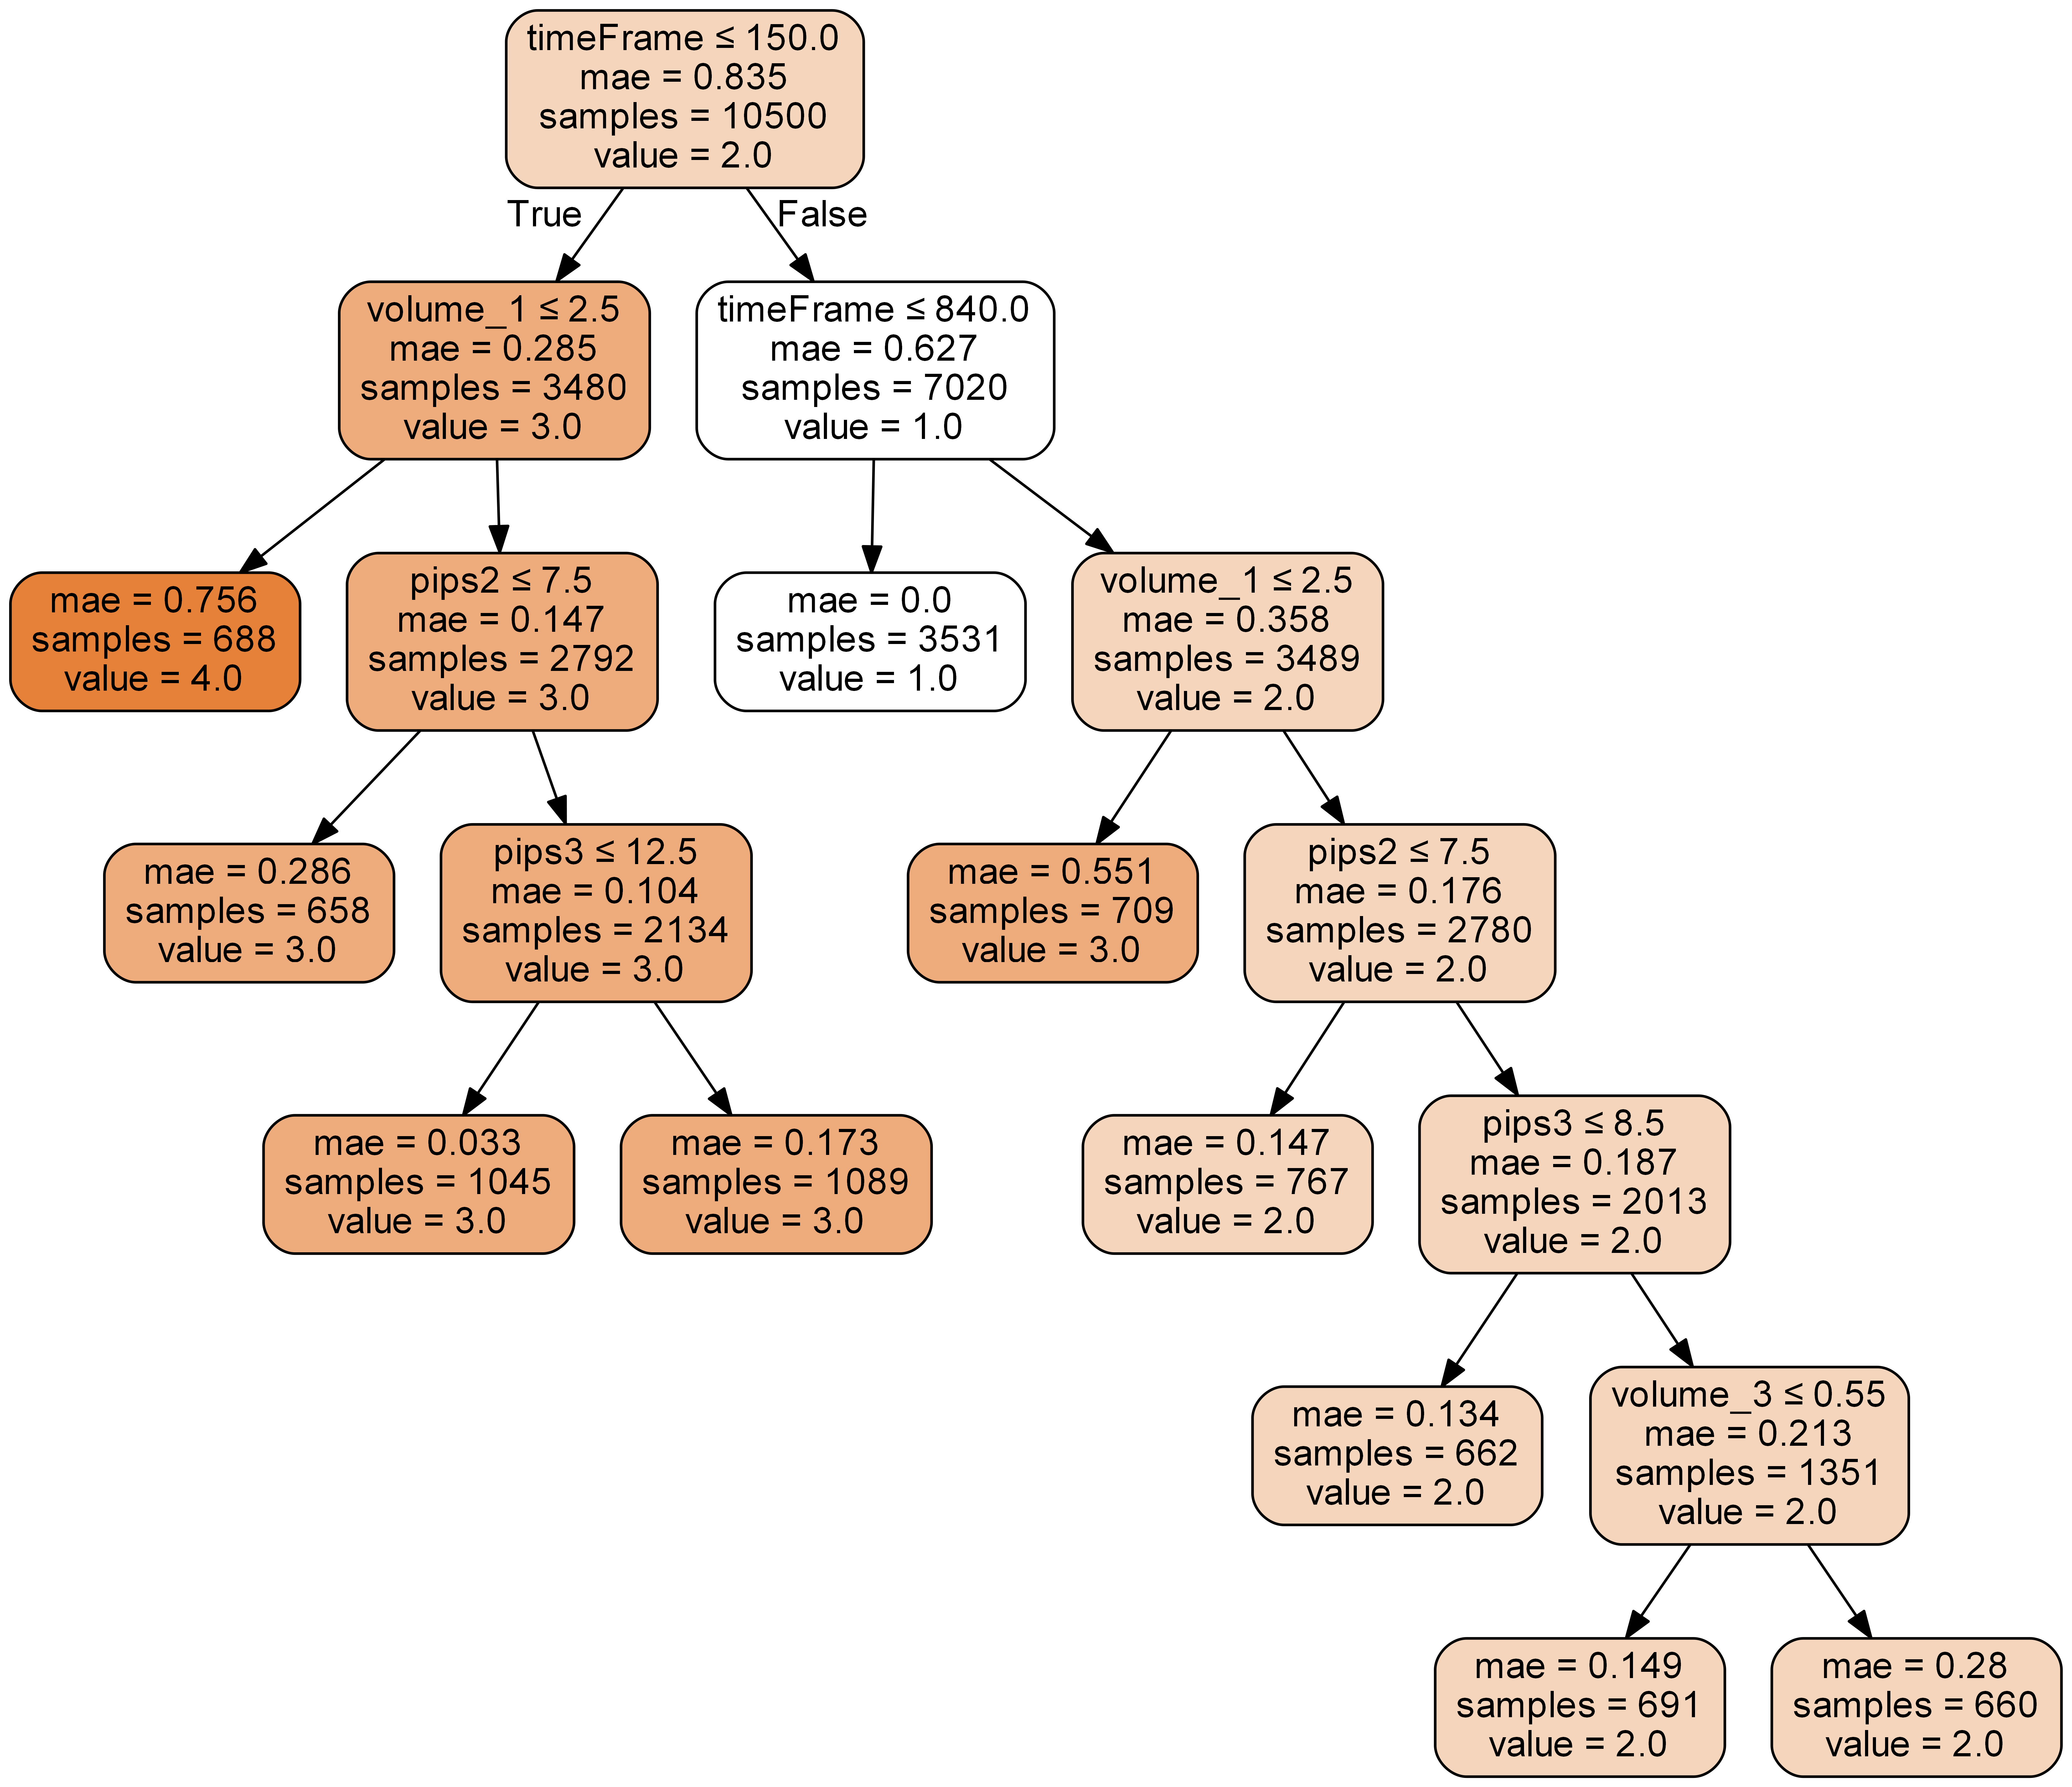

In [92]:
# pip install graphviz
# pip install pydotplus

dot_data = StringIO()
export_graphviz(clf_2, out_file='tree_limited.dot',  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=["volume_1", 
                             "volume_2", 
                             "volume_3", 
                             "pips2",
                             "pips3",
                             "timeFrame"],
                rotate = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('Dyrvo.png')

!dot -Tpng tree_limited.dot -o tree_limited11.png -Gdpi=600

#Image(graph.create_png("C:/Users/Marin/Desktop/python/pic/tree_limited03.png"))

Image(filename = 'tree_limited11.png')


In [93]:
from sklearn.metrics import mean_absolute_error, r2_score

rsq = r2_score(y_test, y_pred)

maerr = mean_absolute_error(y_test, y_pred)

maerr


0.17933333333333334

In [94]:
# Using those arrays, we can parse the tree structure:

n_nodes = clf_2.tree_.node_count
children_left = clf_2.tree_.children_left
children_right = clf_2.tree_.children_right
feature = clf_2.tree_.feature
threshold = clf_2.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        #print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
        #      "node %s."
        print("%snode=%s test node: go to node %s if %s <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature_cols[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = clf_2.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = clf_2.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="

    else:
        threshold_sign = ">"

    print("decision id node %s : %s, %s (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature_cols[feature[node_id]],
             X_test.iloc[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

# feature importance
print('Feature importance')
feature_impo = pd.DataFrame([clf_2.feature_importances_])
feature_impo.columns = feature_cols
feature_impo

The binary tree structure has 19 nodes and has the following tree structure:
node=0 test node: go to node 1 if timeFrame <= 150.0 else to node 8.
	node=1 test node: go to node 2 if volume_1 <= 2.5 else to node 3.
		node=2 leaf node.
		node=3 test node: go to node 4 if pips2 <= 7.5 else to node 5.
			node=4 leaf node.
			node=5 test node: go to node 6 if pips3 <= 12.5 else to node 7.
				node=6 leaf node.
				node=7 leaf node.
	node=8 test node: go to node 9 if timeFrame <= 840.0 else to node 10.
		node=9 leaf node.
		node=10 test node: go to node 11 if volume_1 <= 2.5 else to node 12.
			node=11 leaf node.
			node=12 test node: go to node 13 if pips2 <= 7.5 else to node 14.
				node=13 leaf node.
				node=14 test node: go to node 15 if pips3 <= 8.5 else to node 16.
					node=15 leaf node.
					node=16 test node: go to node 17 if volume_3 <= 0.550000011920929 else to node 18.
						node=17 leaf node.
						node=18 leaf node.

Rules used to predict sample 0: 
decision id node 0 : 0, time

,volume_1,volume_2,volume_3,pips2,pips3,timeFrame
0,0.061709,0.0,4.088278e-18,0.0,4.088278e-18,0.938291
